In [719]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

from math import pi, exp

# Задание 1

In [720]:
d=np.array([0.104, 0.165, 0.187, 0.285, 0.491, 0.973, 0.981])
r=np.array([0, 0.02, 0.05, 0.1, 0.23, 0.5, 1])
t=[480]*len(r)

In [721]:
d2=d[:-1]
r2=r[:-1]
def sum_pow(x, p):
    s=0
    for elem in x:
        s+=elem**p
    return s

def sum2_pow(x, y, p):
    s=0
    for i in range(len(x)):
        s+=y[i]*x[i]**p
    return s

m=2
A=np.array([[sum_pow(r2, i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(r2, d2, i) for i in range(m) ])
X=np.linalg.solve(A, B)
print(X)

global coef
coef=X

def f(x):
    t=[coef[i]*x**i for i in range(len(coef))]
    s=0
    for elem in t:
        s+=elem
    return s

x1=np.linspace(0, 0.5, 9999)
y1=f(x1)


[0.11045077 1.7136615 ]


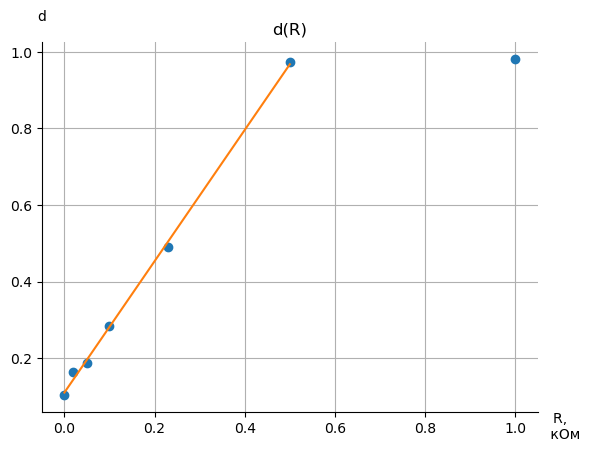

In [722]:
plt.grid()
plt.title("d(R)")
plt.xlabel("R, \n кОм")
plt.ylabel("d", rotation=0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_coords(1.05, 0)
ax.yaxis.set_label_coords(0, 1.05)

#построение на плоскости
plt.plot(r, d, 'o')
plt.plot(x1, y1)


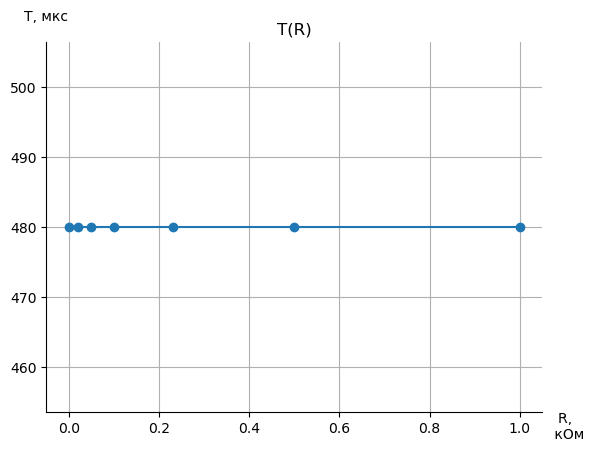

In [723]:
plt.grid()
plt.title("T(R)")
plt.xlabel("R, \n кОм")
plt.ylabel("T, мкс", rotation=0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_coords(1.05, 0)
ax.yaxis.set_label_coords(0, 1.05)

plt.plot(r, t, marker='o')

# Задание 2

In [724]:
f=open("nomer2_01kOm.txt")
w=[]
uc=[]
ul=[]
ur=[]
for line in f:
    a, b, c, d=[float(elem) for elem in line.split()]
    if a:#<4500:
        w+=[a]
        uc+=[b]
        ul+=[c]
        ur+=[d]

n=len(w)
temp=[10]*n

In [725]:
def i0(w, e, r, l, c):
    znam=(r**2+(w*l-1/(w*c))**2)**0.5
    #print(znam)
    return e/znam

def ul0(w, e, r, l, c):
    return i0(w, e, r, l, c)*w*l

def uc0(w, e, r, l, c):
    #print(i0(w, e, r, l, c))
    return i0(w, e, r, l, c)/(w*c)

def ur0(w, e, r, l, c):
    return i0(w, e, r, l, c)*r



l= 0.14706878105665008
r full= 136.41364136413642
q1= 17.880568822817136
17.563256325632565
17.576457645764577
0.12855201281971432
q3= 12.483870967741936
155


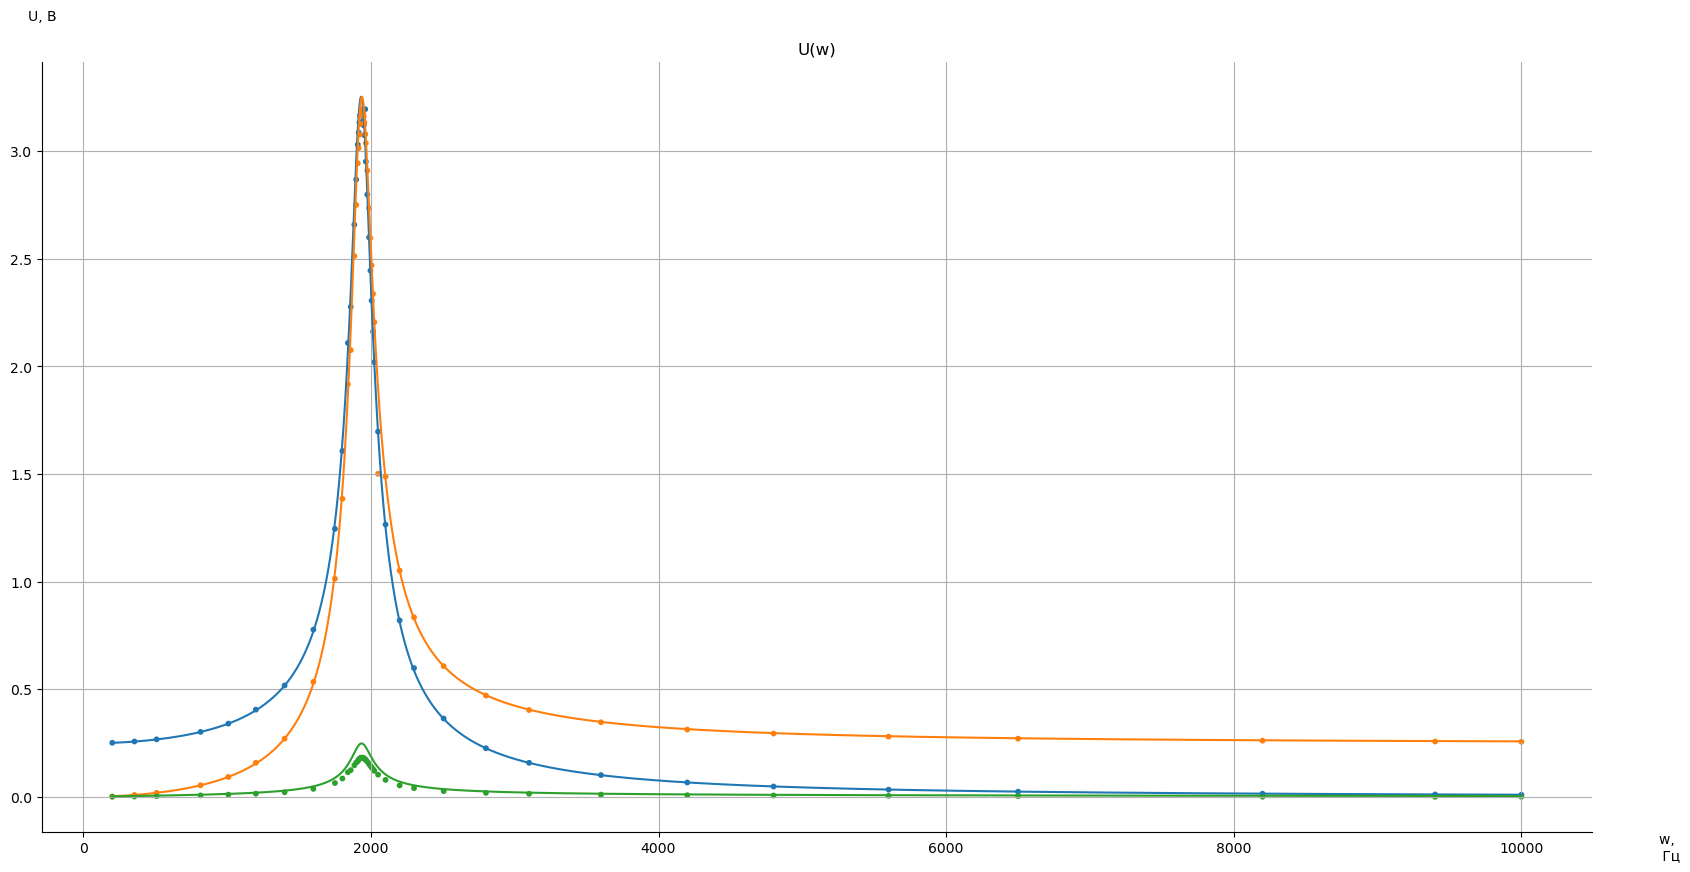

In [726]:
plt.figure(figsize = (20, 10))
plt.grid()
plt.title("U(w)")
plt.xlabel("w, \n Гц")
plt.ylabel("U, В", rotation=0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_coords(1.05, 0)
ax.yaxis.set_label_coords(0, 1.05)

#построение на плоскости

e=0.248
c=46*10**-9
w0=1935
#r=6600#875
r=0.248/max(ur)*100
l=1/(((2*pi*w0)**2)*c)
print("l=",l)


w1=np.linspace(min(w), max(w),9999)
#print(i0(w1,  0.248, 100, 5.78, 4.6*10**-8))
uc1=uc0(w1*2*pi, e, r, l, c)
ul1=ul0(w1*2*pi, e, r, l, c)
ur1=ur0(w1*2*pi, e, r, l, c)
plt.plot(w1, uc1)
plt.plot(w1, ul1)
plt.plot(w1, ur1)


plt.scatter(w, uc, temp)
plt.scatter(w, ul, temp)
plt.scatter(w, ur, temp)

print("r full=",0.248/max(ur)*100)

print("q1=",1/100*(l/c)**0.5)

print(max(ul)/max(ur))
print(max(uc)/max(ur))


print(max(ur)/(2**0.5))
print("q3=", w0/(2015-1860))
print(2015-1860)

In [727]:
f=open("nomer2_1kOm.txt")
w=[]
uc=[]
ul=[]
ur=[]
for line in f:
    a, b, c, d=[float(elem) for elem in line.split()]
    if a:
        w+=[a]
        uc+=[b]
        ul+=[c]
        ur+=[d]

n=len(w)
temp=[10]*n

l= 0.14646262495324405
r full= 1041.5791684166315
q1= 1.7843682657117668
1.855102897942041
1.8500629987400252
0.16836212460051697
q3= 1.5561797752808988
1246


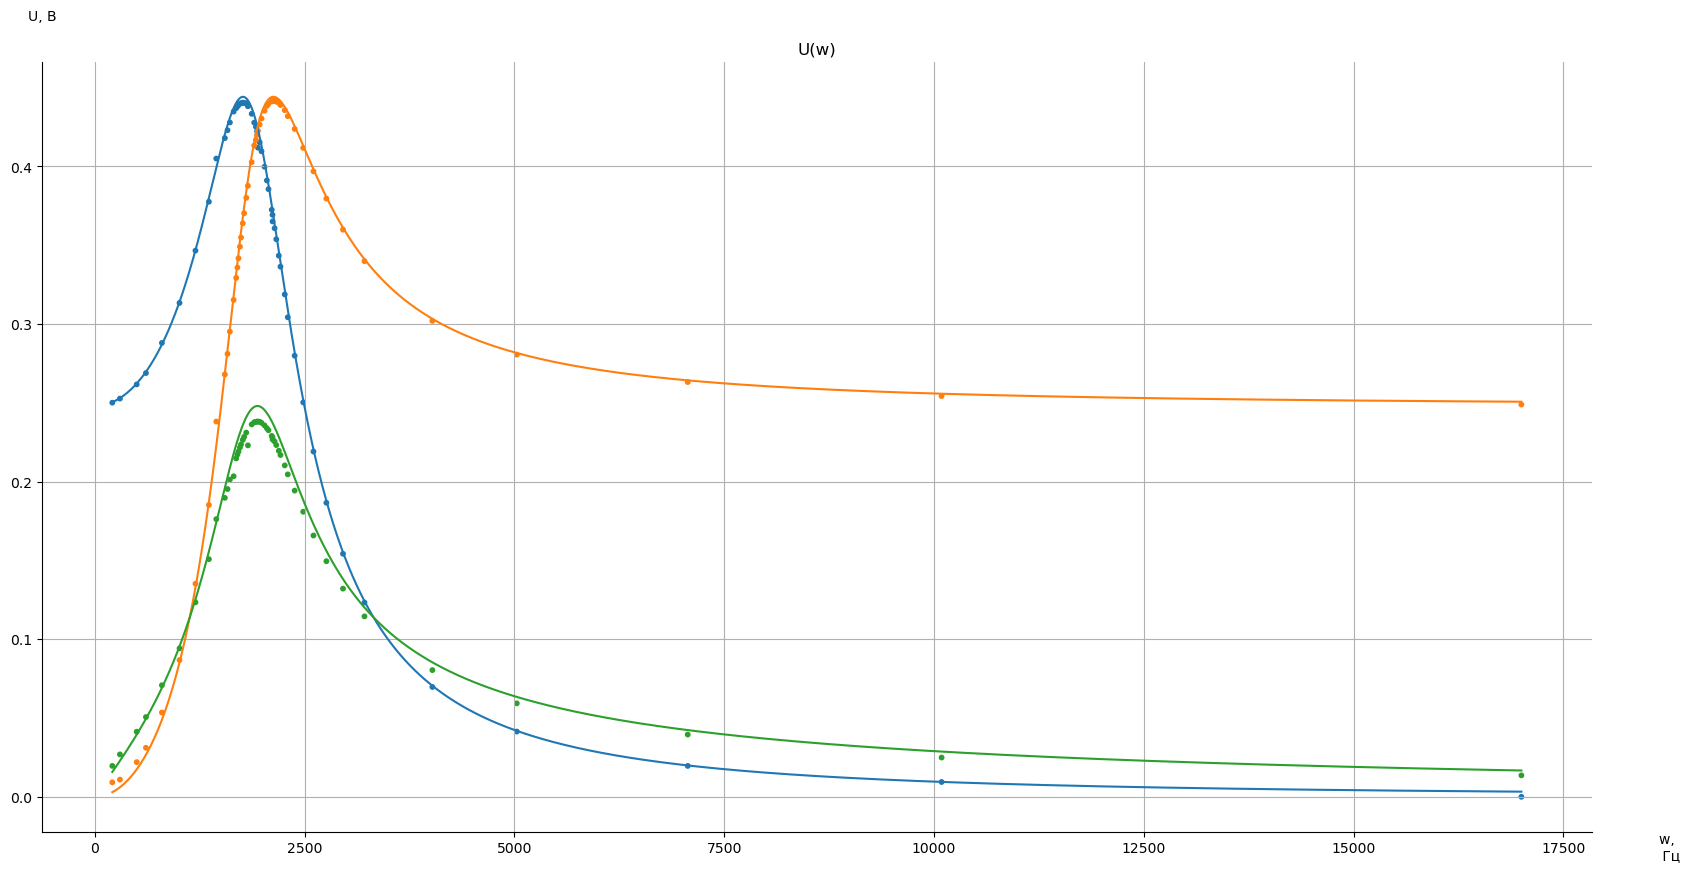

In [728]:
plt.figure(figsize = (20, 10))
plt.grid()
plt.title("U(w)")
plt.xlabel("w, \n Гц")
plt.ylabel("U, В", rotation=0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_coords(1.05, 0)
ax.yaxis.set_label_coords(0, 1.05)

#построение на плоскости

e=0.248
c=46*10**-9
w0=1939
#r=6600#875
r=0.248/max(ur)*1000
l=1/(((2*pi*w0)**2)*c)
print('l=', l)


w1=np.linspace(min(w), max(w),9999)
#print(i0(w1,  0.248, 100, 5.78, 4.6*10**-8))
uc1=uc0(w1*2*pi, e, r, l, c)
ul1=ul0(w1*2*pi, e, r, l, c)
ur1=ur0(w1*2*pi, e, r, l, c)
plt.plot(w1, uc1)
plt.plot(w1, ul1)
plt.plot(w1, ur1)


plt.scatter(w, uc, temp)
plt.scatter(w, ul, temp)
plt.scatter(w, ur, temp)


print("r full=",0.248/max(ur)*1000)

print("q1=",1/1000*(l/c)**0.5)

print(max(ul)/max(ur))
print(max(uc)/max(ur))

print(max(ur)/(2**0.5))
print("q3=", w0/(2606-1360))
print(2606-1360)

# Задание 3

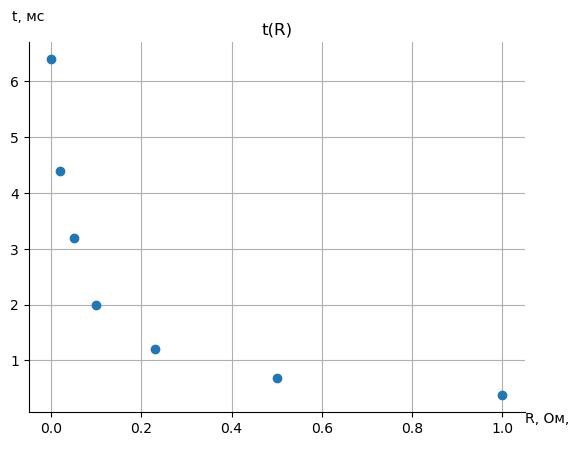

In [729]:
plt.grid()
plt.title("t(R)")
plt.xlabel("R, Oм, \n")
plt.ylabel("t, мс", rotation=0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_coords(1.05, 0)
ax.yaxis.set_label_coords(0, 1.05)

t=[6.4, 4.4, 3.2, 2, 1.2, 0.68, 0.38]
r=np.array([0, 0.02, 0.05, 0.1, 0.23, 0.5, 1])
plt.plot(r, t, 'o')

